### What we are going to cover

* Getting a vision dataset to work with using torchvision.datasets
* Architecture of a convolution neural network (CNN) with pytorch
* An end-to-end multi-class image classification problem
* Steps in modeling with CNNs in PyTorch
1.  Creating a CNN model with PyTorch
2.  Picking a Loss and Optimizer
3. Training a model
4. Evaluating a model



### 0. Computer Vision Libraries for PyTorch

* `torchvision` - base domain library for Pytorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for Pytorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a Dataset

In [5]:
# Import Pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor # Convert PIL Image or numpy.ndarray to tensor.

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


### Gettting a dataset

the dataset we'll be using is FashionMNIST from torchvision.datasets

In [6]:
#Setup Training Data

In [7]:
from torchvision import datasets

train_data = datasets.FashionMNIST(
                  root = "data", # Where to download data to?
                  train = True, # do we want the training dataset?
                  download = True, # do we want to download yes/no?
                  transform = torchvision.transforms.ToTensor(), # how do we want to transform the data?
                  target_transform = None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform= ToTensor(),
    target_transform= None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 198kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.67MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.07MB/s]


In [8]:
len(train_data), len(test_data)

(60000, 10000)

In [9]:
# See the first training example

image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [10]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [11]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [12]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [13]:
# Check the shape
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [14]:
class_names[label]

'Ankle boot'

### Visualizing the data

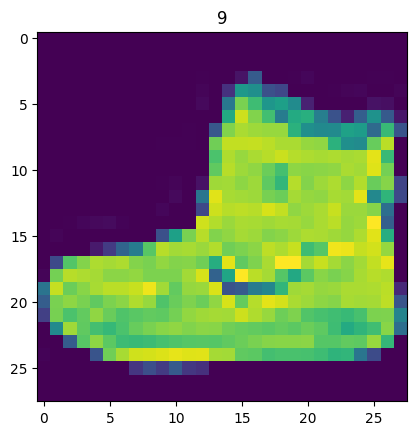

In [15]:
image, label = train_data[0]
plt.imshow(image.squeeze())
plt.title(label)
plt.show()

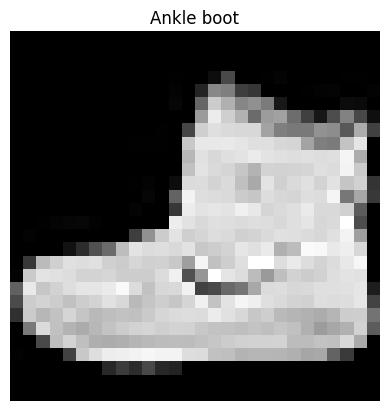

In [16]:
plt.imshow(image.squeeze(), cmap ="grey")
plt.axis(False)
plt.title(class_names[label])
plt.show()

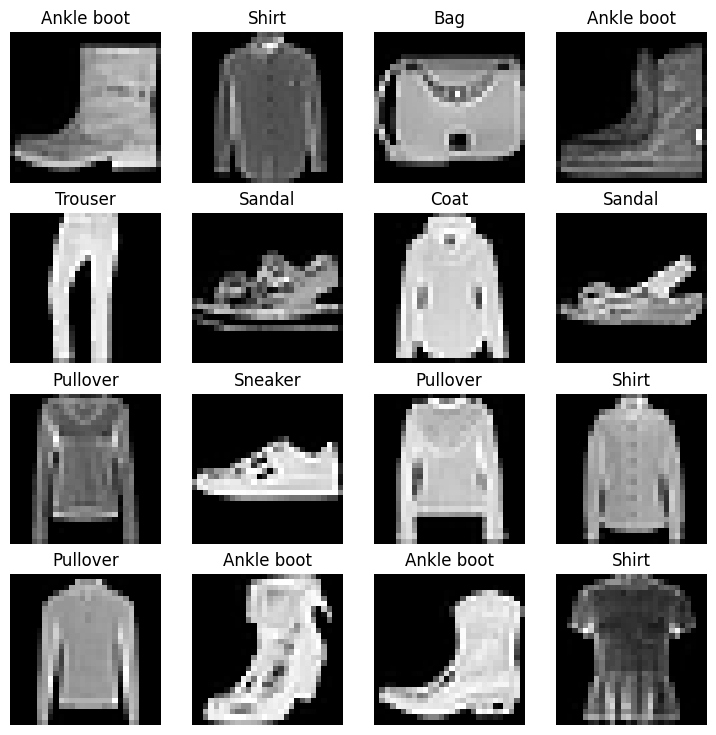

In [17]:
# Plot more images

torch.manual_seed(42)
fig = plt.figure(figsize= (9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap = "grey")
  plt.axis(False)
  plt.title(class_names[label])

plt.show()

Do you think these items of clothing (images) could be modelled with pure linear lines? or do you think we'll need non-linearities?

### Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable

More specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?

1. It is computationally efficient, as in, you rcomputing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).

2. It gives our neural network more chances to update its gradient per epoch

In [18]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [19]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c8e7c3c2b50>,
 <torch.utils.data.dataloader.DataLoader at 0x7c8e7e54db10>)

In [20]:
# Let's checkout what we have created
# 60000 train samples divided into batches with 32 samples in each batch (60000/32 = 1875)
# 10000 test samples divided into batches with 32 samples in each batch (10000 / 32 = 313)

print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of Train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of Test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c8e7c3c2b50>, <torch.utils.data.dataloader.DataLoader object at 0x7c8e7e54db10>)
Length of Train_dataloader: 1875 batches of 32...
Length of Test_dataloader: 313 batches of 32...


In [21]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [22]:
len(train_features_batch)

32

Image size: torch.Size([1, 28, 28])
Label: 6, Label Size: torch.Size([])


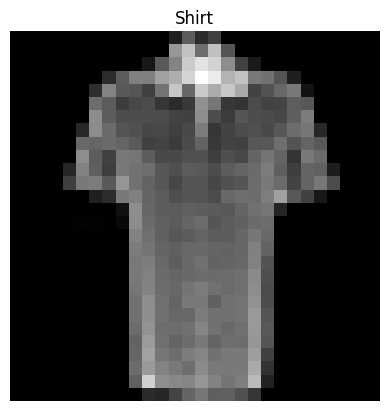

In [23]:
#Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, Label Size: {label.shape}")

### Model 0. Build a baseline model

When starting to build a series of machine learning experiments, it's best practice to start with a baseline model.

A Baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [24]:
#Create a flatten Layer
flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[0]

# Pass this through faltten_model
output = flatten_model(x)

# Print out what happened
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [25]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
        0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2863, 0.0000, 0.0000, 0.0078, 

### Build the Torch Vision Model

In [26]:
from torch import nn

class FashionMNISTModel(nn.Module):
  def __init__(self, input_features:int, hidden_units:int, output_features:int):
      super().__init__()
      self.layer_stack = nn.Sequential(nn.Flatten(),
                                       nn.Linear(in_features=input_features, out_features=hidden_units),
                                       nn.Linear(in_features=hidden_units, out_features=output_features))

  def forward(self, x):
    return self.layer_stack(x)


In [27]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [28]:
torch.manual_seed(42)

#Setup model with input parameters
model_0 = FashionMNISTModel(input_features = 784, # this is 28 * 28
                            hidden_units = 10,
                            output_features= len(class_names)).to(device)
model_0

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [29]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x.to(device))

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [30]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### Setup loss, optimizer and evaluation metrics

* Loss Function - since we're working with multi-class data, our loss function will be nn.CrossEntropyLoss()
* Optimizer - our optimizer torch.optim.SGD() (Stochastic gradient descent)
* Evaluation Metric - Since we're working on a classification problem, let's use accuracy as our evaluation metric

In [31]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions.py is available, Skipping download")
else:
  print("downloading helper_functions.py file")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import accuracy_fn

downloading helper_functions.py file


In [32]:
# Setup Loss and Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_0.parameters(), lr = 0.1)

### Create a function to time our experiments

Machine Learning is very experimental.

Two of the main things you'll often want to track are:

1. Model's performance (loss and accuracy Values etc)
2. How fast it runs

In [33]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device} : {total_time:.3f} seconds")
  return total_time

In [34]:
start_time = timer()
# some code ...
end_time = timer()

print_train_time(start_time, end_time,device)

Train time on cpu : 0.000 seconds


4.814400017494336e-05

### Creating a training loop and training a model on batches of data.

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss per batch.
3. Loop Through testing batches, perform testing steps, calculate the test loss per batch.
4. Print out what's happening
5. Time it all (for fun)

In [35]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# create a training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    X = X.to(device)
    y = y.to(device)
    model_0.train()
    # 1. forward pass
    y_pred = model_0(X)

    # 2. calculate the loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumulate train loss

    # 3. optimizer Zero Grad
    optimizer.zero_grad()

    # 4. Loss Backward
    loss.backward()

    # 5. Optimizer.step()
    optimizer.step()

    # print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataloader to get average train_loss
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      X_test = X_test.to(device)
      y_test = y_test.to(device)
      #1 . Forward Pass
      test_pred = model_0(X_test)

      #2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      #3. calculate accuracy
      test_acc += accuracy_fn(y_true= y_test, y_pred=test_pred.argmax(dim = 1))

    # calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\n Train Loss:{train_loss:.4f} | Test Loss: {test_loss:.4f}, Test acc: {test_acc:.4f} ")

# calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu, end = train_time_end_on_cpu, device = str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train Loss:0.5904 | Test Loss: 0.5095, Test acc: 82.0387 
Epoch: 1
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train Loss:0.4763 | Test Loss: 0.4799, Test acc: 83.1969 
Epoch: 2
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train Loss:0.4550 | Test Loss: 0.4766, Test acc: 83.4265 
Train time on cpu : 28.975 seconds


In [36]:
str(next(model_0.parameters()).device)

'cpu'

### Making Predictions and get Model 0 Results

In [37]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module, accuracy_fn):
  """ Returns a dictionary containing the results of model predicting on data_loader. """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X = X.to(device)
      y = y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc Values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim = 1))

    # Scale loss and Accuracy to find the average loss/acc per batcg
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

#calculate model 0 results on test dataset
model_0_results = eval_model(model = model_0,
                             data_loader= test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

### As part of improving models peformance through experimentation

Setup device agnostic-code (for using a GPU if there is one)

In [38]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


### Model 1: Building a better model with non-linearity



In [39]:
# Create a model with non-linear and linear layers
class FashinMNISTModelV1(nn.Module):
  def __init__(self, input_features: int, output_fetaures : int, hidden_units: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_fetaures),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layer_stack(x)

In [40]:
#Create a manual see
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = FashinMNISTModelV1(input_features=784, # This is the output of the flatten after our 28 * 28 image goes in
                             hidden_units=10,
                             output_fetaures= len(class_names)).to(device) # Send to the GPU if it's available



### Setup loss, optimizer and evaluation metrics

In [41]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measures how wromg our model is
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

### Functionizing training and evaluation/testing loops

* training loop : `train_step()`
* testing loop: `test_step()`

In [42]:
def train_step(model_0: torch.nn.Module,
               train_dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  """Performs a training with model trying to learn on DataLoader"""

  ### Training
  train_loss, train_acc = 0, 0

  ## Put the model in training mode
  model_0.train()

  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    X = X.to(device)
    y = y.to(device)

    # 1. forward pass
    y_pred = model_0(X)

    # 2. calculate the loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumulate train loss
    train_acc += accuracy_fn(y_pred=y_pred.argmax(dim=1), y_true = y) # go from logits to prediction probabilities

    # 3. optimizer Zero Grad
    optimizer.zero_grad()

    # 4. Loss Backward
    loss.backward()

    # 5. Optimizer.step()
    optimizer.step()

  # Divide total train loss and acc by length of train dataloader to get average train_loss
  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  print(f"Train Loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [43]:
def test_step(model_0, test_dataloader, loss_fn, accuracy_fn, device):

  """Performs a testing loop step on model going over data_loader"""

  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      X_test = X_test.to(device)
      y_test = y_test.to(device)
      #1 . Forward Pass(Outputs raw logits)
      test_pred = model_0(X_test)

      #2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      #3. calculate accuracy
      test_acc += accuracy_fn(y_true= y_test, y_pred=test_pred.argmax(dim = 1)) # go from rawlogits to predictions labels

    # calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"Test Loss: {test_loss:.4f}, Test acc: {test_acc:.4f} ")

In [44]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Measure time
from timeit import default_timer as Timer
train_time_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):

  print(f"Epoch: {epoch}\n-------")
  train_step(model_1, train_dataloader, loss_fn, optimizer, accuracy_fn, device)
  test_step(model_1, test_dataloader, loss_fn, accuracy_fn, device)

train_time_end = timer()
total_train_time_model_1 = print_train_time(train_time_start, train_time_end, device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train Loss: 1.09199 | Train acc: 61.34%
Test Loss: 0.9564, Test acc: 64.9960 
Epoch: 1
-------
Train Loss: 0.78101 | Train acc: 71.93%
Test Loss: 0.7223, Test acc: 73.9117 
Epoch: 2
-------
Train Loss: 0.67027 | Train acc: 75.94%
Test Loss: 0.6850, Test acc: 75.0200 
Train time on cpu : 30.946 seconds


**Note**: Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU.

Why is this?

1. It cound be that the overhead for copying data/model to and from the GPU outweights the compute benefits offered by the GPU.
2. the hardware you're using has abetter CPU in terms compute capability than the GPU

In [45]:
model_0_results

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [46]:
total_train_time_model_0

28.975270807000015

In [47]:
#calculate model 0 results on test dataset
model_1_results = eval_model(model = model_1,
                             data_loader= test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashinMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

### Model 2: Building a Convolution Neural Network (CNN)

CNN's are also known ConvNets.

CNNs are known for their Capabilities to find patterns in Visual Data

To find out what's happening inside a CNN, Visit https://poloclub.github.io/cnn-explainer/

In [48]:
#Create a Convolutional Neural Network

class FashionMNISTModelCNN(nn.Module):
  def __init__(self, input_features, hidden_units, output_features):
    super().__init__();
    self.conv_block_1= nn.Sequential(
        nn.Conv2d(in_channels=input_features, out_channels=hidden_units, padding=1, stride=1, kernel_size=3),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2= nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, padding=1, stride=1, kernel_size=3),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.flatten_block = nn.Flatten()
    self.classifier = nn.Sequential(nn.Linear(in_features=hidden_units*7*7, out_features=output_features))

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Conv Block 1 Output Shape: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Conv Block 2 Output Shape: {x.shape}")
    x = self.flatten_block(x)
    # print(f"Flatten Block Output Shape: {x.shape}")
    x = self.classifier(x)
    # print(f"Classifier Output Shape: {x.shape}")
    return x


In [49]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
modelConv = FashionMNISTModelCNN(input_features=1, hidden_units=10, output_features=len(class_names)).to(device)

### Stepping through nn.Conv2d()

In [50]:
torch.manual_seed(42)

#Create a Batch of images
images = torch.randn(size = (32,3,64,64))
test_image = images[0]

print(f"Image Batch shape: {images.shape}")
print(f"Single Image Shape: {test_image.shape}")

Image Batch shape: torch.Size([32, 3, 64, 64])
Single Image Shape: torch.Size([3, 64, 64])


In [51]:
#Creating a single conv2d layer

conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=(3,3), stride=1, padding=1)
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

### Stepping Through `nn.MaxPool2d()`

In [52]:
# Create a sample nn.maxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer and max_pool_layer: {test_image_through_conv_and_max_pool.shape}")

Shape after going through conv_layer(): torch.Size([10, 64, 64])
Shape after going through conv_layer and max_pool_layer: torch.Size([10, 32, 32])


### Passing the random image generated through the FashionMNISTModelCNN

In [53]:
rand_image_tensor = torch.randn(size = (1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [54]:
modelConv(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0426, -0.0984,  0.0621, -0.0358,  0.0184,  0.0271,  0.0163,  0.0133,
         -0.0038, -0.0115]], grad_fn=<AddmmBackward0>)

### Setup a loss function and Optimizer for `model_2`

In [55]:
#Setup loss function/ evla metrics / optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = modelConv.parameters(), lr = 0.01)

### Training and Testing `model_2` using our training and testing functions

In [56]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure Time
from timeit import default_timer as timer
train_time_start_modelCNN = timer()

# Train and test model
epochs = 6
for epoch in tqdm(range(epochs)):
  train_step(model_0= modelConv, train_dataloader= train_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device, optimizer=optimizer)
  test_step(model_0= modelConv, test_dataloader= test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)

train_time_end_modelCNN = timer()
total_train_time_model_Conv = print_train_time(start = train_time_start_modelCNN, end= train_time_end_modelCNN, device = device)

  0%|          | 0/6 [00:00<?, ?it/s]

Train Loss: 1.03780 | Train acc: 62.35%
Test Loss: 0.6250, Test acc: 76.9269 
Train Loss: 0.54948 | Train acc: 80.01%
Test Loss: 0.4988, Test acc: 81.4796 
Train Loss: 0.45576 | Train acc: 83.51%
Test Loss: 0.4408, Test acc: 84.2153 
Train Loss: 0.41325 | Train acc: 85.14%
Test Loss: 0.4128, Test acc: 85.4333 
Train Loss: 0.38663 | Train acc: 86.16%
Test Loss: 0.3991, Test acc: 85.9525 
Train Loss: 0.36708 | Train acc: 86.96%
Test Loss: 0.3836, Test acc: 86.8111 
Train time on cpu : 334.189 seconds


In [57]:
modelevalResults = eval_model(model = modelConv, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
modelevalResults

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelCNN',
 'model_loss': 0.38357001543045044,
 'model_acc': 86.81110223642173}

### Compare Model Results and Training Time

In [58]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, modelevalResults])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModel,0.476639,83.426518
1,FashinMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelCNN,0.383570,86.811102


In [59]:
# Add Training time to results comparision
compare_results["Training_time"] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_Conv]
compare_results


,model_name,model_loss,model_acc,Training_time
0,FashionMNISTModel,0.476639,83.426518,28.975271
1,FashinMNISTModelV1,0.685001,75.019968,30.946198
2,FashionMNISTModelCNN,0.383570,86.811102,334.188878


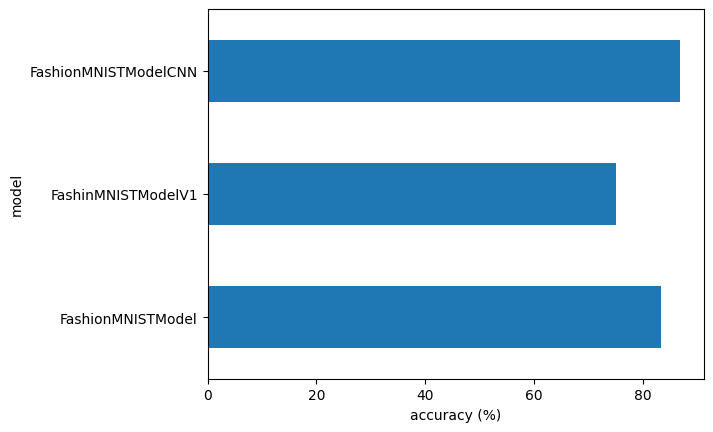

In [60]:
#Visualize our model
compare_results.set_index("model_name")["model_acc"].plot(kind = "barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")
plt.show()

### Make and evaluate random predictions with best model

In [61]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for sample in data:
      # prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim = 0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)
      #Get prediction probabilities (logit -> prediction probabilities)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)

      #Get the predition probabilities off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  #Stack the pred probs to turn list into a tensor
  return torch.stack(pred_probs)

In [62]:
import random
random.seed(42)

test_samples = []
test_labels = []

for sample ,label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

#View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

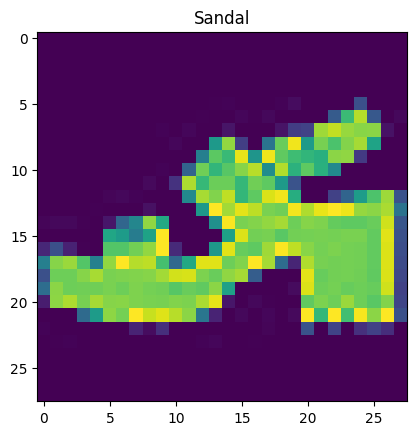

In [63]:
plt.imshow(test_samples[0].squeeze())
plt.title(class_names[test_labels[0]])
plt.show()

### Make some predictions

In [64]:
pred_probs = make_predictions(model = modelConv, data = test_samples)

#View first twp prediction probabilities
pred_probs[:2]

tensor([[1.1611e-08, 7.0126e-11, 2.5468e-09, 7.0277e-10, 4.5171e-11, 9.9831e-01,
         2.0390e-08, 4.1988e-06, 7.6439e-06, 1.6742e-03],
        [1.0518e-02, 8.6681e-01, 1.7905e-03, 9.8638e-02, 9.7683e-03, 1.8477e-05,
         1.2028e-02, 4.5361e-05, 3.7304e-04, 6.2872e-06]])

In [65]:
#Convert prediction probabilities to Predictions
pred_classes = pred_probs.argmax(dim = 1)
pred_classes

tensor([5, 1, 7, 2, 3, 0, 4, 7, 1])

In [66]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

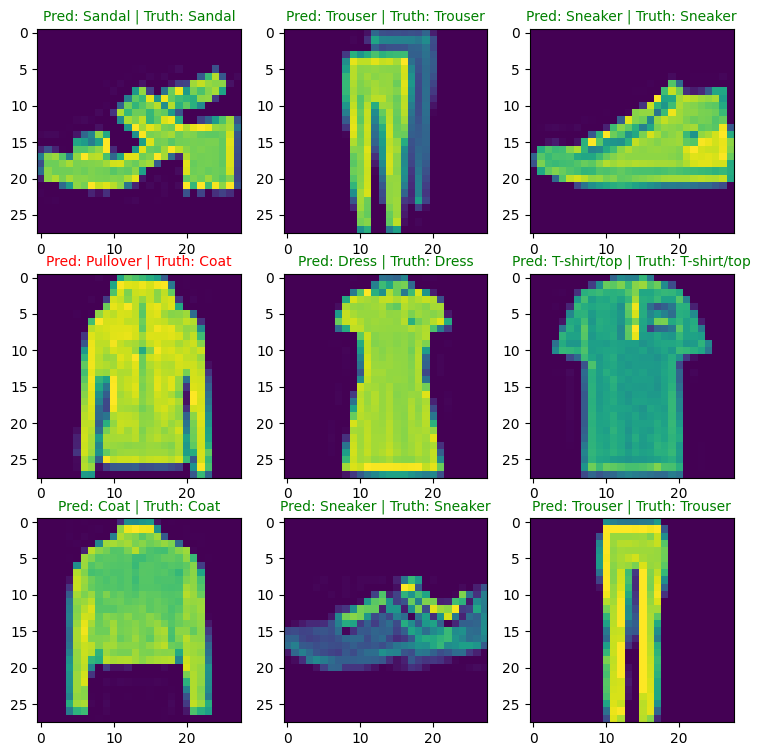

In [67]:
#Plot Predictions
plt.figure(figsize = (9,9))
nrows = 3
ncols = 3

for i, samples in enumerate(test_samples):

  #Create Subplot
  plt.subplot(nrows, ncols, i+1)

  # plot the target image
  plt.imshow(samples.squeeze())

  # Find the prediction (in text form)
  pred_label = class_names[pred_classes[i]]

  #Find the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  #Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for the equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, color ="green", fontsize = 10)
  else:
    plt.title(title_text, color ="red", fontsize = 10)

### Making a confusion Matrix for further prediction evaluation

1. Make predictions with our trained model on the test dataset
2. Make a confusion Matrix `torchmetrics.ConfusionMatrix`
3. Plot the Confusion Matrix using `mlxtend.plotting.plot_confusion_matrix()`


In [68]:
# Making predictions across our entire Dataset

from tqdm.auto import tqdm

# 1. Make Predictions with trained model
y_preds = []
modelConv. eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc= "Making Predictions on Entire test dataset...."):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)

    # Do the forward pass
    y_logits = modelConv(X)


    #Turn predictions from logits --> prediction probabilities --> prediction labels
    y_pred_softmax = torch.softmax(y_logits,dim = 0)

    y_pred = y_pred_softmax.argmax(dim=1)

    #Put preds on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions to a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]


Making Predictions on Entire test dataset....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [69]:
len(y_pred_tensor)

10000

In [70]:
# See if required packages are installed and if not, install them...

try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19"
except:
  ! pip install -q torchmetrics -U mlxtend # q - Less installation logs, U - force update to latest version
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.6 MB/s eta 0:00:00
mlxtend version: 0.23.4


In [71]:
mlxtend.__version__ # May need to restart runtime if installed

'0.23.4'

### Constructing and Plotting Confusion Matrix

In [72]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes = len(class_names), task="multiclass")
confmat_tensor = confmat(preds = y_pred_tensor, target = test_data.targets)
confmat_tensor

tensor([[602,   7,  36,  96,   4,   1, 241,   0,  13,   0],
        [ 15, 663,  11, 279,  21,   0,   9,   0,   2,   0],
        [ 14,   2, 717,  29,  99,   0, 125,   0,  14,   0],
        [ 23,  13,  16, 892,  15,   0,  36,   0,   4,   1],
        [  6,   7, 140,  99, 579,   0, 159,   0,  10,   0],
        [  6,   0,   0,   2,   0, 740,   1, 109, 114,  28],
        [ 90,   5,  94,  81,  73,   0, 647,   0,  10,   0],
        [  1,   0,   0,   0,   0,  27,   0, 934,  10,  28],
        [  6,   2,  11,  14,   4,   6,  31,   5, 920,   1],
        [  0,   0,   0,   1,   0,  65,   2, 138,  25, 769]])

### Plotting the Confusion Matrix

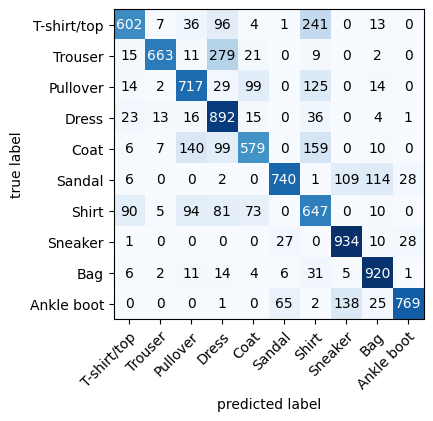

In [73]:
fig, ax = plot_confusion_matrix(conf_mat= confmat_tensor.numpy(), class_names=class_names, figsize=(4,7))

### Save and Load the Model

In [74]:
from pathlib import Path

#Create model Directory Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok= True) # Parents - True will allow

#Create model Save
MODEL_NAME = "03_pytorch_computer_vision_conv.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save Model state dict
print(f"Saving Model to: {MODEL_SAVE_PATH}")
torch.save(obj=modelConv.state_dict(), f = MODEL_SAVE_PATH)

Saving Model to: models/03_pytorch_computer_vision_conv.pth


In [75]:
# Create a new instance
torch.manual_seed(42)

loaded_model_CSV = FashionMNISTModelCNN(input_features=1, hidden_units=10, output_features=len(class_names)).to(device)
loaded_model_CSV.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [76]:
# Evaluate Loaded Model
torch.manual_seed(42)

loaded_model_CSV_results = eval_model(model = loaded_model_CSV, data_loader = test_dataloader, loss_fn = loss_fn, accuracy_fn= accuracy_fn)
loaded_model_CSV_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelCNN',
 'model_loss': 0.38357001543045044,
 'model_acc': 86.81110223642173}

In [77]:
modelevalResults # Results of loaded model and the Stored Model Results matched

{'model_name': 'FashionMNISTModelCNN',
 'model_loss': 0.38357001543045044,
 'model_acc': 86.81110223642173}

In [78]:
# Check if model results are close to each other
torch.isclose(torch.tensor(modelevalResults["model_loss"]), torch.tensor(loaded_model_CSV_results["model_loss"]), atol = 1e-02) # atol indicates tolerance

tensor(True)